# Продвинутый вариант выполнения задания

## Импортируем необходимые для начала модули и подгружаем наши датасеты

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Выше можно видеть подключение модуля warnings и вызов функции из него.
Это сделано для того, чтобы при вызове каких-либо функций лишние предупреждения неограниченной длины не мешали восприятию информации.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/src_2hw/orders.csv')
products_df = pd.read_csv('/content/drive/MyDrive/src_2hw/products.csv')
regions_df = pd.read_csv('/content/drive/MyDrive/src_2hw/regions.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/src_2hw/stores.csv')

Таблица orders.csv - наш основной dataset, используемый бОльшую часть времени. Поэтому его обозначим за df.

In [4]:
df.head() # Вызовем первые строки датасеты для того, чтобы понять структуру

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id
0,0,5014,20562761,41,7.04,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
1,1,5014,20562761,31,23.45,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
2,2,3856,20562753,7,51.94,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
3,3,3856,20562753,4,188.84,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
4,4,10825,20562723,12,85.99,43.608,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             20000 non-null  int64  
 1   order_id             20000 non-null  int64  
 2   product_id           20000 non-null  int64  
 3   price                20000 non-null  float64
 4   profit               17911 non-null  float64
 5   delivery_distance    20000 non-null  int64  
 6   date_create          19986 non-null  object 
 7   order_start_prepare  18010 non-null  object 
 8   planned_prep_time    20000 non-null  float64
 9   order_ready          17999 non-null  object 
 10  order_pickup         20000 non-null  object 
 11  region_id            20000 non-null  int64  
 12  status_id            20000 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 2.0+ MB


Удалили лишний столбец с дополнительной индексацией. Можно видеть, что имеем несколько категориальных, численных фичей, а также показателей времени.

## Начало выполнения заданий варианта

In [6]:
df['order_start_prepare'] = pd.to_datetime(df['order_start_prepare'])
df['order_ready'] = pd.to_datetime(df['order_ready'])

Конвертируем колонки в формат datetime

In [7]:
df.isna().sum()

,0
store_id,0
order_id,0
product_id,0
price,0
profit,2089
delivery_distance,0
date_create,14
order_start_prepare,1990
planned_prep_time,0
order_ready,2001


Посчитаем количество пропусков для каждой из колонок

## Графики корреляции, гистограмм и ядерной плотности для лучшего понимания данных

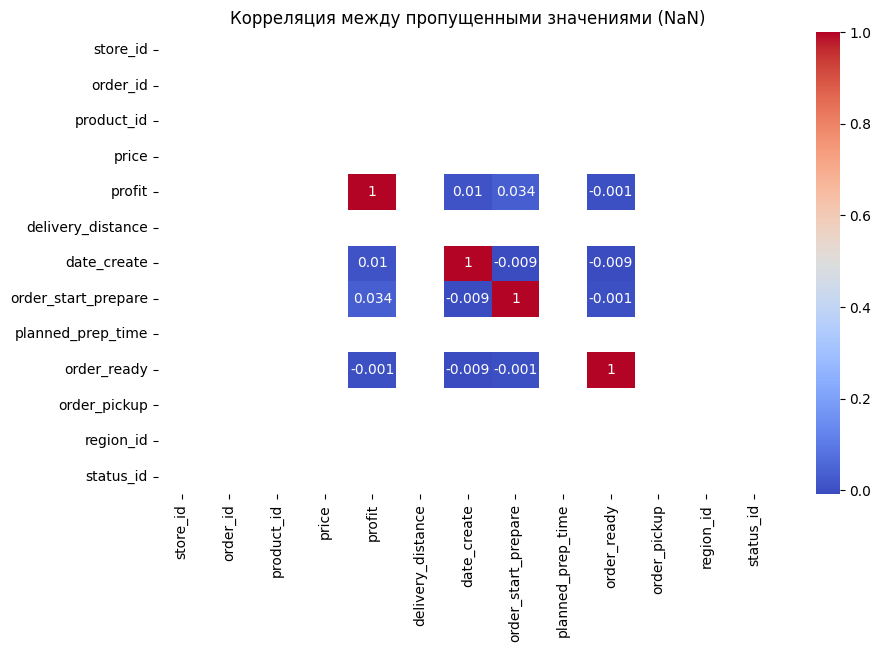

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

nan_indicators = df.isna().astype(int)
nan_corr = round(nan_indicators.corr(), 3)

plt.figure(figsize=(10, 6))
sns.heatmap(nan_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция между пропущенными значениями (NaN)')
plt.show()

Можно видеть, что корреляции между пропущенными значениями нет. Значит пропуски можно считать случайными.

In [12]:
import plotly.express as px

fig = px.histogram(df, x='store_id', labels={'store_id': 'ID магазина'}, title='Распределение по магазинам')
fig.update_layout(xaxis_title='ID магазина', yaxis_title='Количество заказов')
fig.show()

Из графика выше можем видеть, что заказы поступали чаще всего с магазинов ID которых лежит в промежутке 3400-3599. Есть также пару промежутков, где количество заказов практически достигло этой величины.

In [13]:
fig = px.histogram(df, x='product_id', labels={'product_id', 'ID продукта'}, title='Распределение по продуктам')
fig.update_layout(xaxis_title='ID продутка', yaxis_title='Количество заказов')
fig.show()

Из графика выше можно видеть, что ни один из продуктов не имеет существенного преобладания перед другим. То есть заказчики не отдавали предпочтенья тому или иному товару в большей степени. Грубо говоря, все продукты заказывали практически одинаково.

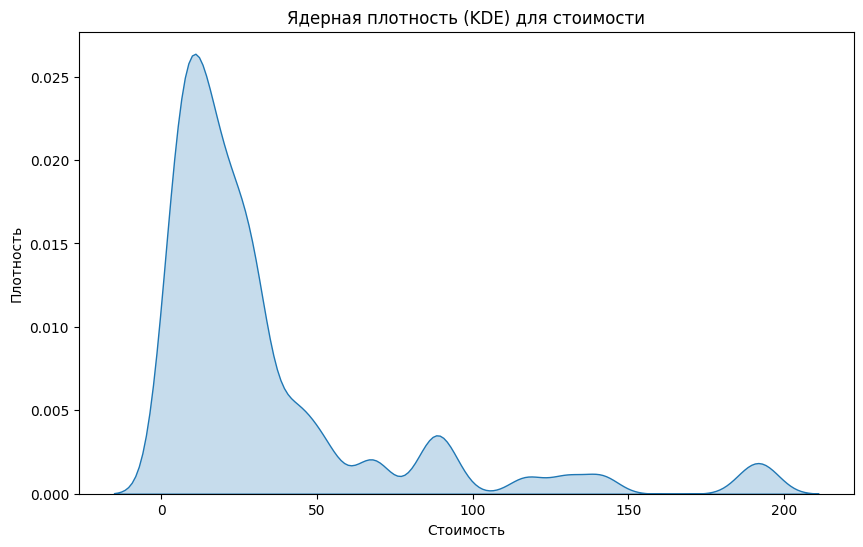

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.price < 210].price, shade=True)
plt.title('Ядерная плотность (KDE) для стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Плотность')
plt.show()

Видно, что график унимодальный. Наибольшая плотность стоимости продуктов лежит от 0 до 50 едениц

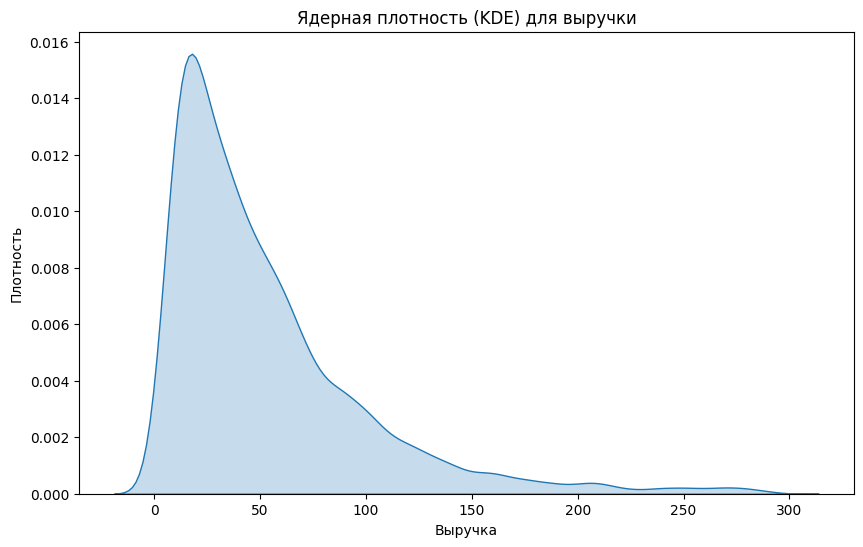

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.profit < 300].profit, shade=True)
plt.title('Ядерная плотность (KDE) для выручки')
plt.xlabel('Выручка')
plt.ylabel('Плотность')
plt.show()

Выручка имеет такую же моду и наибольшую плотность на интервале 0-50. График унимодальный

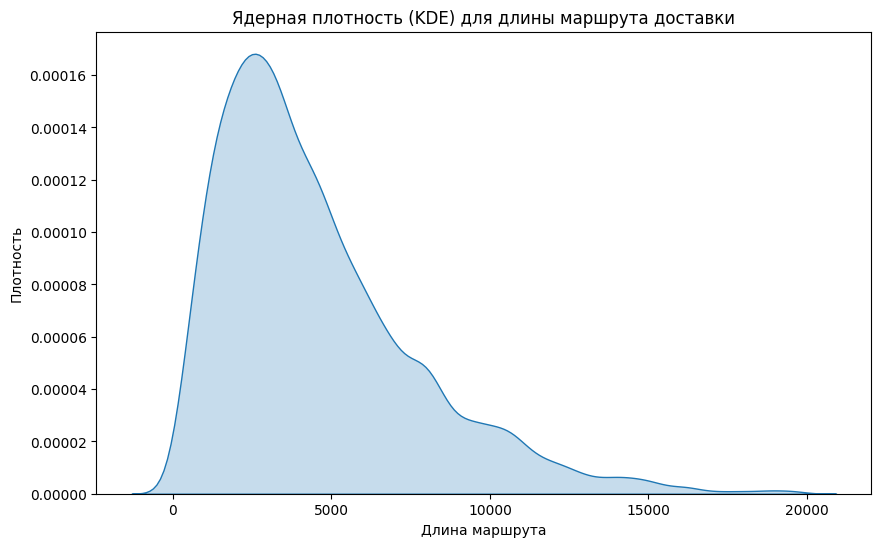

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.delivery_distance < 20_000].delivery_distance, shade=True)
plt.title('Ядерная плотность (KDE) для длины маршрута доставки')
plt.xlabel('Длина маршрута')
plt.ylabel('Плотность')
plt.show()

Для длины маршрута график также унимодален. Самые плотные значения лежат чуть ниже 5000 единиц.

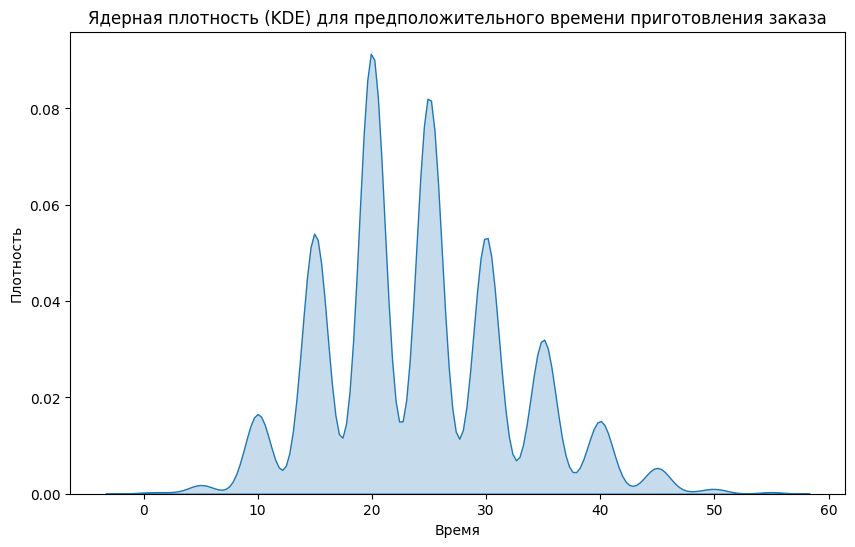

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.planned_prep_time < 60].planned_prep_time, shade=True)
plt.title('Ядерная плотность (KDE) для предположительного времени приготовления заказа')
plt.xlabel('Время')
plt.ylabel('Плотность')
plt.show()

Видно, что график выше полимодальный. "Плотнее" всего мода на 20 минутах, вторая после неё - между 20 и 30 минутами. Также можно видеть, что заказов, на выполнение которых заложено менее 10 и более 50 практически нет. Это может говорить о довольно быстрой работе предприятия или отсутсвия спроса на большие заказы :)

## Заполнение пропусков

In [ ]:
df['profit'] = df.profit.fillna(df.profit.mean())
 # заполняем пропуски средним значением

df['date_create'] = pd.to_datetime(df['date_create'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['order_start_prepare'] = pd.to_datetime(df['order_start_prepare'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
# переводим колонки в формат datetime

df['date_create'] = df.date_create.fillna(method='ffill')
# заполняем пропуски предыдущими значениями

df['order_start_prepare'] = df.order_start_prepare.fillna(
    pd.to_datetime(df.date_create) + (df.order_start_prepare.mean() - df.date_create.mean())
    )
# заполняем пропуски суммой среднего колонки и среднего разницы между ожидаемым временем и реальным

average_delta = (df['order_ready'] - df['order_start_prepare']).mean().total_seconds() / 60
planned_prep_time_avg = df['planned_prep_time'].mean()
total_prep_time = average_delta + planned_prep_time_avg
# Рассчитываем среднее время завершения подготовки и плановое среднее время
# Суммируем их, чтобы получить общее время подготовки.

df['order_ready'] = df['order_ready'].fillna(
    df['order_start_prepare'] + pd.to_timedelta(total_prep_time, unit='m')
)
# Заполняем пропуски, добавляя общее время подготовки к 'order_start_prepare'.

Изучив датасет можно видеть, что порядок записей идёт снизу вверх. То есть самое старое значение будет иметь самый большой ID. Исходя из этого и небольшого количества пропусков в 'date_create' заполняем колонку предыдущими значениями

In [ ]:
df.isna().sum()

,0
store_id,0
order_id,0
product_id,0
price,0
profit,0
delivery_distance,0
date_create,0
order_start_prepare,0
planned_prep_time,0
order_ready,0


Проверяем количество пропусков и видим, что успешно избавились от них

## Проверка на наличие аномалий (выбросов) и избавление от них

### Анализ выбросов

In [23]:
def find_outliers(data, feature, threshold = 1.5):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    low = data[feature].quantile(0.25) - (IQR * threshold)
    up = data[feature].quantile(0.75) + (IQR * threshold)
    outliers = pd.concat([data[feature] < low, data[feature] > up], axis=1)
    outliers_index = outliers.any(axis=1)
    return outliers_index

Воспользуемся функцией из практики для поиска выбросов по квантилям. Заранее инициализируем её

In [17]:
fig = px.box(df, y='price', title='Распределение выбросов по ценам')
fig.update_layout(yaxis_title='Цена')
fig.show()

Явно видно, что график сильно сплющен. Точки экстремально далеко от основной области - много выбросов.

In [18]:
fig = px.box(df, y='profit', title='Распределение выбросов по выручке')
fig.update_layout(yaxis_title ='Выручка')
fig.show()

Аналогично график очень сплющен. Видно большое количество выбросов.

In [19]:
fig = px.box(df, y='delivery_distance', title='Распределение выбросов по длине маршрута доставки')
fig.update_layout(yaxis_title = 'Длина маршрута доставки')
fig.show()

Аналогичная ситуация с длинами маршрутов доставки.

In [20]:
fig = px.box(df, y='planned_prep_time', title='Распределение выбросов по предполагаемому времени приготовления заказа')
fig.update_layout(yaxis_title= 'Предполагаемое время приготовления заказа')
fig.show()

Также имеем выбросы выше графика. Но уже видно, что граф менее сплющен и имеет выбросы снизу

### Избавление от выбросов путём замены

In [24]:
price_outliers = find_outliers(df, 'price')
profit_outliers = find_outliers(df, 'profit')
distance_outliers = find_outliers(df, 'delivery_distance')
time_outliers = find_outliers(df, 'planned_prep_time')

Используем функцию и находим наши выбросы

In [25]:
no_price_outliers = df['price'][~price_outliers]
no_profit_outliers = df['profit'][~profit_outliers]
no_distance_outliers = df['delivery_distance'][~distance_outliers]
no_time_outliers = df['planned_prep_time'][~time_outliers]

Вычленяем выбросы, полученные с помощью функции, оставив колонки без них. Проверим, действительно ли функция нашла хотя бы бОльшую часть выбросов.

In [26]:
fig = px.box(no_price_outliers, y='price', title = 'Распределение значений без выбросов для цены')
fig.update_layout(yaxis_title="Цена")
fig.show()

In [27]:
fig = px.box(no_profit_outliers, y='profit', title = 'Распределение значений без выбросов для выручки')
fig.update_layout(yaxis_title="Выручка")
fig.show()

In [28]:
fig = px.box(no_distance_outliers, y='delivery_distance', title = 'Распределение значений без выбросов для длины маршрута доставки')
fig.update_layout(yaxis_title="Длина маршрута доставки")
fig.show()

In [29]:
fig = px.box(no_time_outliers, y='planned_prep_time', title = 'Распределение значений без выбросов для предполагаемого времени приготовления заказа')
fig.update_layout(yaxis_title="Предполагаемое время приготовления заказа")
fig.show()

In [31]:
df.loc[price_outliers, 'price'] = df['price'].mode()
df.loc[profit_outliers, 'profit'] = df['profit'].mode()
df.loc[distance_outliers, 'delivery_distance'] = df['delivery_distance'].mode()
df.loc[time_outliers, 'planned_prep_time'] = df['planned_prep_time'].mean()

Заменяем выбросы на моду или среднее. Выбор был сделан после анализа графика переменной

## Создание новых переменных, преобразования и последующий анализ

Для добавления каждой из переменных данные датасетов были представлены в виде словаря и с помощью метода .map() преобразованы в значения, соответствующие id в таблице.

In [32]:
stores_map = stores_df.set_index('store_id')['store_name'].to_dict()
df['store_name'] = df['store_id'].map(stores_map)

In [33]:
products_map = products_df.set_index('product_id')['product_name'].to_dict()
df['product_name'] = df['product_id'].map(products_map)

In [34]:
regions_map = regions_df.set_index('region_id')['delivery_region_name'].to_dict()
df['region_name'] = df['region_id'].map(regions_map)

In [35]:
df['items_count'] = df.groupby('date_create')['product_name'].transform('count')
df['order_price'] = df.groupby('date_create')['price'].transform('sum')

Создали количество продуктов в заказе и сумму заказа путём группировки по дате создания. Таким образом колонки созданные в одно время, созданные с точностью до секунд будут считаться одним заказом. Далее по цене или имени продукта посчитали необходимое значение

In [36]:
df = df.drop('price', axis=1)

Удаляем ненужную более для анализа колонку со значением цены каждого товара

In [39]:
fig = px.histogram(df, x='product_name', labels={'product_name', 'Имя продукта'}, title='Распределение заказов по продуктам (с названиями продуктов)')
fig.update_layout(xaxis_title = 'Название продукта', yaxis_title = 'Количество заказанных')
fig.show()

In [45]:
df = df.drop('product_id', axis=1)
df = df.drop_duplicates()

Удаляем ненужную колонку с id продуктов

In [46]:
df['day_of_week'] = df['order_start_prepare'].dt.day_name()
df['hour_start'] = df['order_start_prepare'].dt.hour
df['minutes_start'] = df['order_start_prepare'].dt.minute

Создаём новые колонки для более удобного формата работы

In [47]:
df.describe()

,store_id,order_id,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,items_count,order_price,hour_start,minutes_start
count,19644.000000,1.964400e+04,16614.000000,18972.000000,17685,19644.000000,17675,19644.000000,19630.000000,19630.000000,17685.000000,17685.000000
mean,6712.928019,2.054895e+07,44.908622,4214.166878,2024-09-04 13:22:03.855414272,23.977358,2024-09-04 13:45:41.676039936,690.634189,3.635914,58.668620,15.185920,29.322929
min,3053.000000,2.053583e+07,0.979600,6.000000,2024-09-03 15:02:04,5.000000,2024-09-03 15:10:42,683.000000,1.000000,0.000000,0.000000,0.000000
25%,3970.000000,2.054205e+07,18.723000,2190.000000,2024-09-03 21:50:56,20.000000,2024-09-03 22:12:32.500000,683.000000,2.000000,28.410000,12.000000,14.000000
50%,5955.000000,2.054898e+07,36.498000,3638.000000,2024-09-04 14:23:30,25.000000,2024-09-04 14:47:30,685.000000,3.000000,50.480000,16.000000,29.000000
75%,9321.500000,2.055534e+07,63.200000,5785.250000,2024-09-04 21:21:15,30.000000,2024-09-04 21:41:07,695.000000,5.000000,79.400000,19.000000,44.000000
max,11963.000000,2.056276e+07,145.360000,11857.000000,2024-09-05 15:25:33,45.000000,2024-09-05 15:39:30,717.000000,15.000000,256.540000,23.000000,59.000000
std,2835.596691,7.729908e+03,32.568465,2630.758126,NaN,7.850355,NaN,9.831237,2.047638,41.931721,5.295213,17.198869


Проверяем статистические показатели колонок

## Повторный анализ после преобразований

In [48]:
fig = px.histogram(df, x='store_name', labels={'store_name', 'Название магазина'}, title='Количество заказов по магазинам')
fig.update_layout(xaxis_title = 'Название магазина', yaxis_title='Количество заказов')
fig.show()

Из графика видно, что больше всего заказов поступало из KFC в ТЦ Гринвич. В остальном - распределение +- равномерное

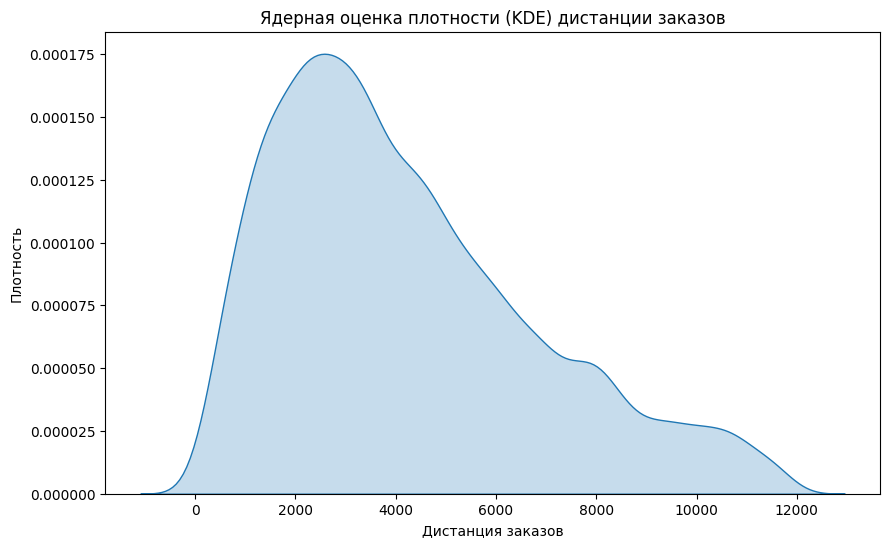

In [49]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.delivery_distance, shade = True)
plt.title('Ядерная оценка плотности (KDE) дистанции заказов')
plt.xlabel('Дистанция заказов')
plt.ylabel('Плотность')
plt.show()

Видно, что чаще самое плотное значение дистанции лежит в промежутке от 2000 до 4000. График унимодальный

In [50]:
fig = px.histogram(df, x='hour_start', labels={'hour_start', 'Час начала приготовления'}, title='Количество заказов на каждый час')
fig.update_layout(xaxis_title = 'Час начала приготовления', yaxis_title = 'Количество заказов')
fig.show()

Из графика выше видно, что пик заказов приходится на 12 и 19 часов соответственно. С 23 до 7 роста не наблюдается

In [51]:
fig = px.histogram(df, x='minutes_start', labels={'minutes_start', 'Минута начала приготовления'}, title='Количество заказов на каждую минуту часа')
fig.update_layout(xaxis_title='Минута начала приготовления', yaxis_title='Количество заказов')
fig.show()

Видно, что каждую минуту поступало какое-то количество заказов. Какой-то зависимости или закономерности не выявлено.

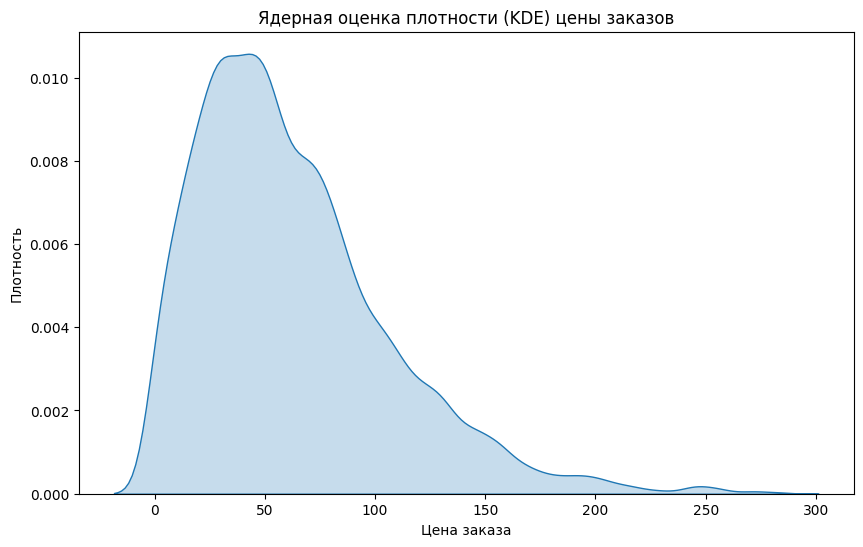

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.order_price < 300].order_price, shade = True)
plt.title('Ядерная оценка плотности (KDE) цены заказов')
plt.xlabel('Цена заказа')
plt.ylabel('Плотность')
plt.show()

Видно, что график унимодальный. Самое плотное значение цены заказа в районе 50

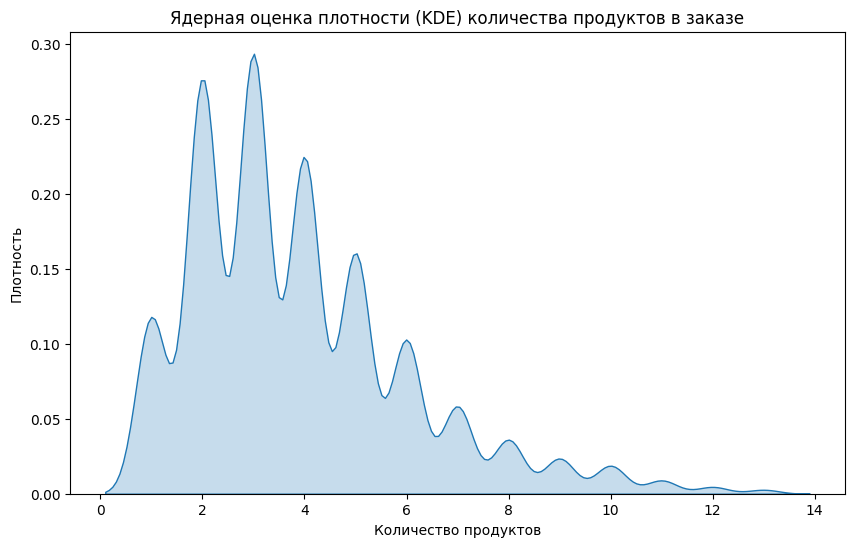

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.items_count < 15.0].items_count, shade = True)
plt.title('Ядерная оценка плотности (KDE) количества продуктов в заказе')
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность')
plt.show()

Видно что график полимодальный, для значения более 6 плотность значений сильно падает

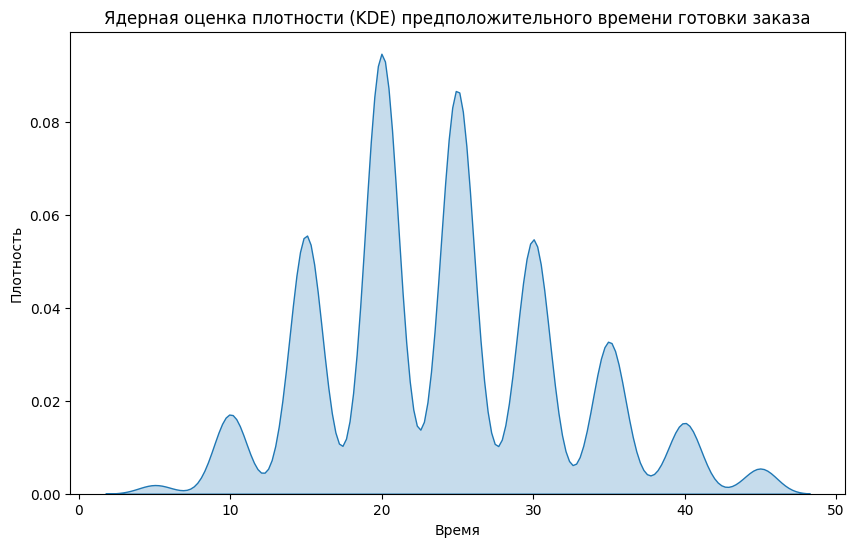

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.planned_prep_time, shade = True)
plt.title('Ядерная оценка плотности (KDE) предположительного времени готовки заказа')
plt.xlabel('Время')
plt.ylabel('Плотность')
plt.show()

График полимодальный, но можно видеть, что заказы менее 10 и более 40 минут резко падают в плотности

In [52]:
fig = px.histogram(df, x='region_name', labels={'region_name', 'Название района'}, title='Количество заказов по районам')
fig.update_layout(xaxis_title = 'Название района', yaxis_title = 'Количество заказов')
fig.show()

In [53]:
fig = px.histogram(df, x='day_of_week', labels={'day_of_week', 'День недели'}, title='Количество заказов по дням недели')
fig.update_layout(xaxis_title = 'День недели', yaxis_title='Количество заказов')
fig.show()

## Заключительные преобразования и корреляционный анализ результатов

In [55]:
df = df.drop(['store_name', 'product_name', 'region_name'], axis = 1)
df = df.drop_duplicates()

Избавляемся от уже ненужным переменных

In [56]:
import numpy as np

df['hour_start_sin'] = np.sin(2 * np.pi * df['hour_start'] / 24)
df['hour_start_cos'] = np.cos(2 * np.pi * df['hour_start'] / 24)

Производим циклические преобразования для часовой переменной

In [57]:
df['prepared_on_time'] = ((df['order_ready'] - df['order_start_prepare']).dt.total_seconds() / 60) <= df['planned_prep_time'] + 5

Создаём целевую переменную

In [58]:
df.value_counts()

store_id  order_id  profit   delivery_distance  date_create          order_start_prepare  planned_prep_time  order_ready          order_pickup         region_id  status_id  items_count  order_price  day_of_week  hour_start  minutes_start  hour_start_sin  hour_start_cos  prepared_on_time
3053      20535945  33.1800  6615.0             2024-09-03 15:08:25  2024-09-03 15:17:42  30.0               2024-09-03 15:44:10  03-09-2024 16:12:10  683        F          3.0          38.47        Tuesday      15.0        17.0           -0.707107       -0.707107       True                1
8717      20554977  16.7480  7141.0             2024-09-04 20:53:18  2024-09-04 20:53:36  20.0               2024-09-04 21:28:51  04-09-2024 21:56:51  683        F          3.0          65.64        Wednesday    20.0        53.0           -0.866025        0.500000       False               1
          20554523  41.0800  4865.0             2024-09-04 20:24:58  2024-09-04 20:26:02  20.0               2024-09-04 21:14:28  04-09-2024 21:42:28  683        F          3.0          8.20         Wednesday    20.0        26.0           -0.866025        0.500000       False               1
          20552895  4.4240   10784.0            2024-09-04 19:02:00  2024-09-04 19:41:23  20.0               2024-09-04 19:44:08  04-09-2024 20:12:08  683        F          3.0          25.06        Wednesday    19.0        41.0           -0.965926        0.258819       True                1
          20552827  7.7025   8349.0             2024-09-04 18:58:31  2024-09-04 19:21:59  10.0               2024-09-04 19:23:11  04-09-2024 19:51:11  683        F          2.0          57.46        Wednesday    19.0        21.0           -0.965926        0.258819       True                1
                                                                                                                                                                                                                                                                                                  ..
4742      20555519  39.3420  3209.0             2024-09-04 21:31:06  2024-09-04 21:36:40  30.0               2024-09-04 22:03:21  04-09-2024 22:31:21  683        F          5.0          100.11       Wednesday    21.0        36.0           -0.707107        0.707107       True                1
          20555335  37.6830  7584.0             2024-09-04 21:18:58  2024-09-04 21:23:02  35.0               2024-09-04 22:01:18  04-09-2024 22:29:18  683        F          6.0          105.11       Wednesday    21.0        23.0           -0.707107        0.707107       True                1
          20554607  18.3912  8035.0             2024-09-04 20:30:15  2024-09-04 20:34:32  30.0               2024-09-04 21:15:48  04-09-2024 21:43:48  683        F          6.0          88.10        Wednesday    20.0        34.0           -0.866025        0.500000       False               1
          20553895  27.5710  2919.0             2024-09-04 19:51:27  2024-09-04 19:52:49  30.0               2024-09-04 20:23:30  04-09-2024 20:51:30  683        F          2.0          48.09        Wednesday    19.0        52.0           -0.965926        0.258819       True                1
11963     20547801  35.4710  579.0              2024-09-04 13:20:34  2024-09-04 13:57:18  10.0               2024-09-04 14:11:19  04-09-2024 14:39:19  697        F          4.0          54.88        Wednesday    13.0        57.0           -0.258819       -0.965926       True                1
Name: count, Length: 5359, dtype: int64

Производим проверку на баланс классов. Можно видеть, что имеется явный дисбаланс классов. Например, по store_id

In [59]:
df_numeric = df.select_dtypes(include=['number']).copy()
df_numeric = pd.concat([df_numeric, df[['prepared_on_time']]], axis = 1)
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,store_id,order_id,profit,delivery_distance,planned_prep_time,region_id,items_count,order_price,hour_start,minutes_start,hour_start_sin,hour_start_cos,prepared_on_time
store_id,1.000000,-0.018342,-0.055768,0.014139,-0.203985,0.109412,-0.098783,-0.079867,0.022760,-0.011715,-0.015344,0.064720,0.003563
order_id,-0.018342,1.000000,-0.050118,-0.021657,-0.025495,-0.010697,-0.037164,-0.022185,-0.193600,0.021600,0.300793,-0.214471,0.011658
profit,-0.055768,-0.050118,1.000000,0.088949,0.287101,-0.169356,0.361157,0.261969,0.083567,0.011280,-0.120318,0.016386,0.004795
delivery_distance,0.014139,-0.021657,0.088949,1.000000,0.030916,-0.170098,0.087235,0.058215,0.006423,0.001400,-0.002860,0.058254,-0.054784
planned_prep_time,-0.203985,-0.025495,0.287101,0.030916,1.000000,-0.132753,0.271797,0.204417,0.027825,0.015933,-0.034154,-0.041449,0.033767
region_id,0.109412,-0.010697,-0.169356,-0.170098,-0.132753,1.000000,-0.055296,-0.040926,0.020136,0.004811,-0.013174,0.067530,0.022842
items_count,-0.098783,-0.037164,0.361157,0.087235,0.271797,-0.055296,1.000000,0.777493,0.052647,-0.011133,-0.086023,0.027437,-0.013142
order_price,-0.079867,-0.022185,0.261969,0.058215,0.204417,-0.040926,0.777493,1.000000,0.053072,-0.018513,-0.069962,0.024349,-0.013416
hour_start,0.022760,-0.193600,0.083567,0.006423,0.027825,0.020136,0.052647,0.053072,1.000000,-0.015692,-0.747537,0.292921,0.021466
minutes_start,-0.011715,0.021600,0.011280,0.001400,0.015933,0.004811,-0.011133,-0.018513,-0.015692,1.000000,0.027465,-0.046907,-0.019163


Корреляция между числовыми признакми и целевой переменной. Видна незначительная корреляция между часом начала приготовления заказа и целевой переменной. Помимо этого сильно коррелируют между собой значения количества продуктов и стоимости заказа

In [60]:
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.9 MB/s eta 0:00:00


Подключаем необходимые для PHI-k корреляции модули

interval columns not set, guessing: ['store_id', 'order_id', 'profit', 'delivery_distance', 'planned_prep_time', 'region_id', 'items_count', 'order_price', 'hour_start', 'minutes_start', 'hour_start_sin', 'hour_start_cos']


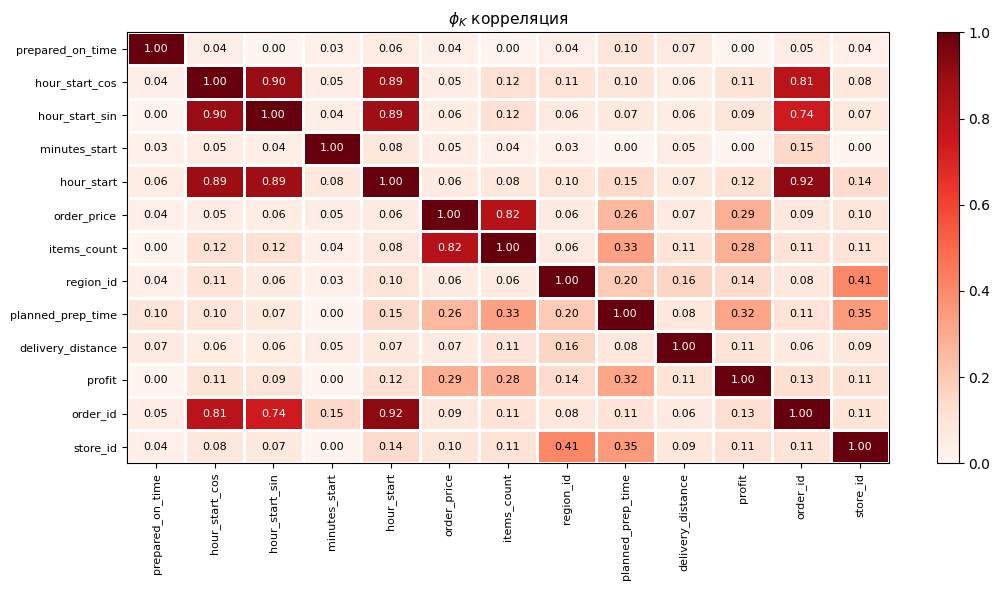

In [62]:
phik_overview = df_numeric.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Reds",
                        title=r"$\phi_K$ корреляция",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

Из PHI-k корреляции можем видеть коррелирующие между собой значения, которые выделены более тёмно-красным цветом в то время как светлые ячейки говорят нам о практическом отсутствии корреляции.